<a href="https://colab.research.google.com/github/AndrehAguiar/POS-Graduacao-Inteligecia_Artificial-Ciencia_de_Dados/blob/master/projeto_2/classificador_projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) Qual a base escolhida?

*Indique a base escolhida.*<br />
Forest covertypes - https://archive.ics.uci.edu/ml/datasets/Covertype

### 2) **(10%)** Pré-processamento: entendimento do conjunto de dados
- Quais são minhas features?
- Quais são minhas classes?
- Como estão distribuidas minhas classes?
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [0]:
#@title Importações necessárias: pandas, seaborn, matplotlib, numpy e sklearn.
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import fetch_covtype
df = fetch_covtype()
print(df['DESCR'])

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30Ã—30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like object
with the feature matrix in the ``data`` member
and the target values in ``target``.
The dataset will be 

In [0]:
#@title Funções para tratamento de dados categóricos:<ul><li>Define os dados e classes.</li><li>Categoriza os Tipos de Cobertura.</li><li>Categoriza os Tipos de Área.</li><li>Categoriza os Tipos de Solo.</li><li>Define o número de componentes (PCA)</li><li>Define o número de k (KNN)</li><li>Define as *Labels* dos gráficos de comparação (Acertos e Erros)</li></ul>
def getData():
  X = df['data']
  y = df['target']
  return (X, y)


def nomea_coverType(int):    
  if int == 1:
    return 'Abeto'
  elif int == 2:
    return 'Pinheiro'
  elif int == 3:
    return 'Pinheiro Ponderosa'
  elif int == 4:
    return 'Salgueiro'
  elif int == 5:
    return 'Álamo'
  elif int == 6:
    return 'Abeto-Douglas'
  elif int == 7:
    return 'Algodoeiro'


def nomea_area(DataFrame):
    
  df_area = pd.DataFrame()
  df_area['Area'] = 'NaN'
  for row, area in df_amostra.iterrows():
    if df_amostra.loc[row, 'Rawah_Area'] == 1:
      df_area.loc[row, 'Area'] = 'Rawah'
    elif df_amostra.loc[row, 'Neota_Area'] == 1:
      df_area.loc[row, 'Area'] = 'Neota'
    elif df_amostra.loc[row, 'Comanche_Peak_Area'] == 1:
      df_area.loc[row, 'Area'] = 'Comanche_Peak'
    else:
      df_area.loc[row, 'Area'] = 'Cache_la_Poudre'
  return df_area


def nomea_solo(DataFrame):
  df_solo = df_amostra.drop(['Elevação', 'Aspecto', 'Inclinação', 'H_Distance_Hidrologia','Hillshade_Noon', 'Hillshade_3pm', 'H_Distance_Fire_Points','Rawah_Area', 'Neota_Area', 'Comanche_Peak_Area','Cache_la_Poudre_Area','V_Distance_Hidrologia', 'H_Distance_Roadways', 'Hillshade_9am','Cover_Type'], inplace=False, axis=1)
  colunas = df_solo.columns
  solo_array = []
  for i in range(0,40):    
    tipo_solo = colunas[i].split(' ')
    solo = tipo_solo[-1]
    solo_array.append(solo)
  df_solo.columns = solo_array
  df_solo['Solo'] = 0
  for row, solo in df_amostra.iterrows():
    for i in range(1,41):
      if df_solo.loc[row, str(i)] == 1:
        df_solo.loc[row, 'Solo'] = i
  df_solo = df_solo[['Solo']]
  return df_solo


def define_nComponentesPCA(X_train, X_test, y_train, y_test, qtd_test):
  for i in range(18, 55, 3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)
    pca = PCA(n_components=i)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    componentes = pca.explained_variance_ratio_
    dtree.fit(X_train, y_train)
    predict = dtree.predict(X_test)
    error_rate.append(np.mean(predict != y_test))
    if np.mean(predict != y_test) == min(error_rate):
      n_feature = i
  return n_feature


def reduz_dimensionPCA(X_train, X_test):
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
    
  return X_train, X_test



def define_k(X_train, X_test, y_train, y_test):
    
    
  for i in range(1, 10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))
    if np.mean(pred != y_test) == min(error_rate):
        
      k = i    
    
  return k


def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
        
def acertos_erros(tunned_confusion, knn_tunned_confusion):
    acertos_dtree = []
    acertos_knn = []
    erros_dtree = []
    erros_knn = []
    for i in range(0,7):
      acertos_dtree.append(tunned_confusion[i:i+1,i:i+1][0][0])
      erros_dtree.append(tunned_confusion[i].sum()-tunned_confusion[i][i])
      acertos_knn.append(knn_tunned_confusion[i:i+1,i:i+1][0][0])
      erros_knn.append(knn_tunned_confusion[i].sum()-knn_tunned_confusion[i][i])

    compara_data = []
    compara_data.append(acertos_dtree)
    compara_data.append(acertos_knn)
    compara_data.append(erros_dtree)
    compara_data.append(erros_knn)
    return compara_data

In [0]:
#@title Cria DataFrame a partir do dataset.
df_covtypes = pd.DataFrame(df['data'], columns=['Elevação','Aspecto','Inclinação','H_Distance_Hidrologia','V_Distance_Hidrologia','H_Distance_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','H_Distance_Fire_Points','Rawah_Area','Neota_Area','Comanche_Peak_Area','Cache_la_Poudre_Area','tipo de solo 1','tipo de solo 2','tipo de solo 3','tipo de solo 4','tipo de solo 5','tipo de solo 6','tipo de solo 7','tipo de solo 8','tipo de solo 9','tipo de solo 10','tipo de solo 11','tipo de solo 12','tipo de solo 13','tipo de solo 14','tipo de solo 15','tipo de solo 16','tipo de solo 17','tipo de solo 18','tipo de solo 19','tipo de solo 20','tipo de solo 21','tipo de solo 22','tipo de solo 23','tipo de solo 24','tipo de solo 25','tipo de solo 26','tipo de solo 27','tipo de solo 28','tipo de solo 29','tipo de solo 30','tipo de solo 31','tipo de solo 32','tipo de solo 33','tipo de solo 34','tipo de solo 35','tipo de solo 36','tipo de solo 37','tipo de solo 38','tipo de solo 39','tipo de solo 40'])
df_covtypes['Cover_Type'] = df['target']
df_covtypes.head()

,Elevação,Aspecto,Inclinação,H_Distance_Hidrologia,V_Distance_Hidrologia,H_Distance_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,H_Distance_Fire_Points,...,tipo de solo 32,tipo de solo 33,tipo de solo 34,tipo de solo 35,tipo de solo 36,tipo de solo 37,tipo de solo 38,tipo de solo 39,tipo de solo 40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [0]:
#@title Cria DataFrame de amostra para análise exploratória dos dados.
amostra = df_covtypes[np.random.rand(len(df_covtypes)) < 0.3]
amostra.describe()

,Elevação,Aspecto,Inclinação,H_Distance_Hidrologia,V_Distance_Hidrologia,H_Distance_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,H_Distance_Fire_Points,...,tipo de solo 32,tipo de solo 33,tipo de solo 34,tipo de solo 35,tipo de solo 36,tipo de solo 37,tipo de solo 38,tipo de solo 39,tipo de solo 40,Cover_Type
count,173657.000000,173657.000000,173657.000000,173657.000000,173657.000000,173657.000000,173657.000000,173657.000000,173657.000000,173657.000000,...,173657.000000,173657.000000,173657.000000,173657.000000,173657.000000,173657.000000,173657.000000,173657.000000,173657.000000,173657.000000
mean,2959.429064,155.684568,14.106635,269.610088,46.320978,2350.694686,212.137282,223.276430,142.499893,1978.421647,...,0.090051,0.077889,0.002960,0.003271,0.000190,0.000495,0.026328,0.023857,0.015139,2.048872
std,279.211637,112.020565,7.482090,212.569002,58.078461,1559.915053,26.764102,19.802856,38.282899,1323.006496,...,0.286256,0.267998,0.054324,0.057098,0.013784,0.022248,0.160109,0.152605,0.122106,1.391105
min,1859.000000,0.000000,0.000000,0.000000,-166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2995.000000,127.000000,13.000000,218.000000,30.000000,1999.000000,218.000000,226.000000,143.000000,1708.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,261.000000,18.000000,384.000000,69.000000,3326.000000,231.000000,237.000000,168.000000,2549.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7087.000000,254.000000,254.000000,254.000000,7172.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [0]:
#@title Cria e converte DataFrame com as colunas mais relevantes.
df_amostra = amostra[np.random.rand(len(amostra)) < 0.03]
amostra_covers = df_amostra['Cover_Type']
df_amostra = df_amostra.join(nomea_solo(df_amostra))
df_amostra = df_amostra.join(nomea_area(df_amostra))
df_amostra = df_amostra[['Aspecto','Elevação','Inclinação','Solo','Area']]
df_amostra['Cover_Type'] = amostra_covers.apply(nomea_coverType)
df_amostra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5192 entries, 96 to 580900
Data columns (total 6 columns):
Aspecto       5192 non-null float64
Elevação      5192 non-null float64
Inclinação    5192 non-null float64
Solo          5192 non-null int64
Area          5192 non-null object
Cover_Type    5192 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 443.9+ KB


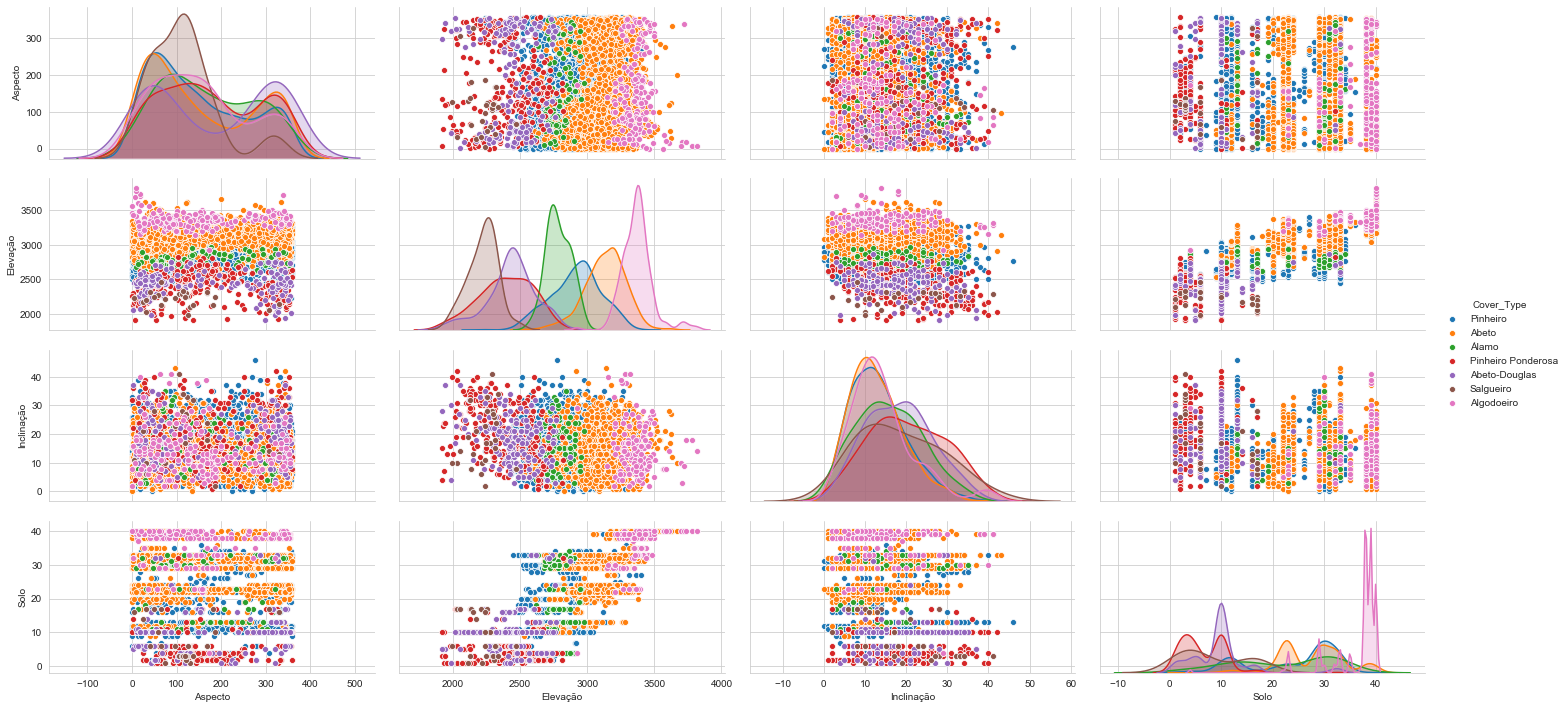

In [0]:
#@title Cria gráfico de corelação e distribuição das *Features* / Tipos de cobertura.
sns.set_style('whitegrid')
#sns.set_palette('rainbow')
sns.pairplot(df_amostra, hue='Cover_Type', aspect=2)

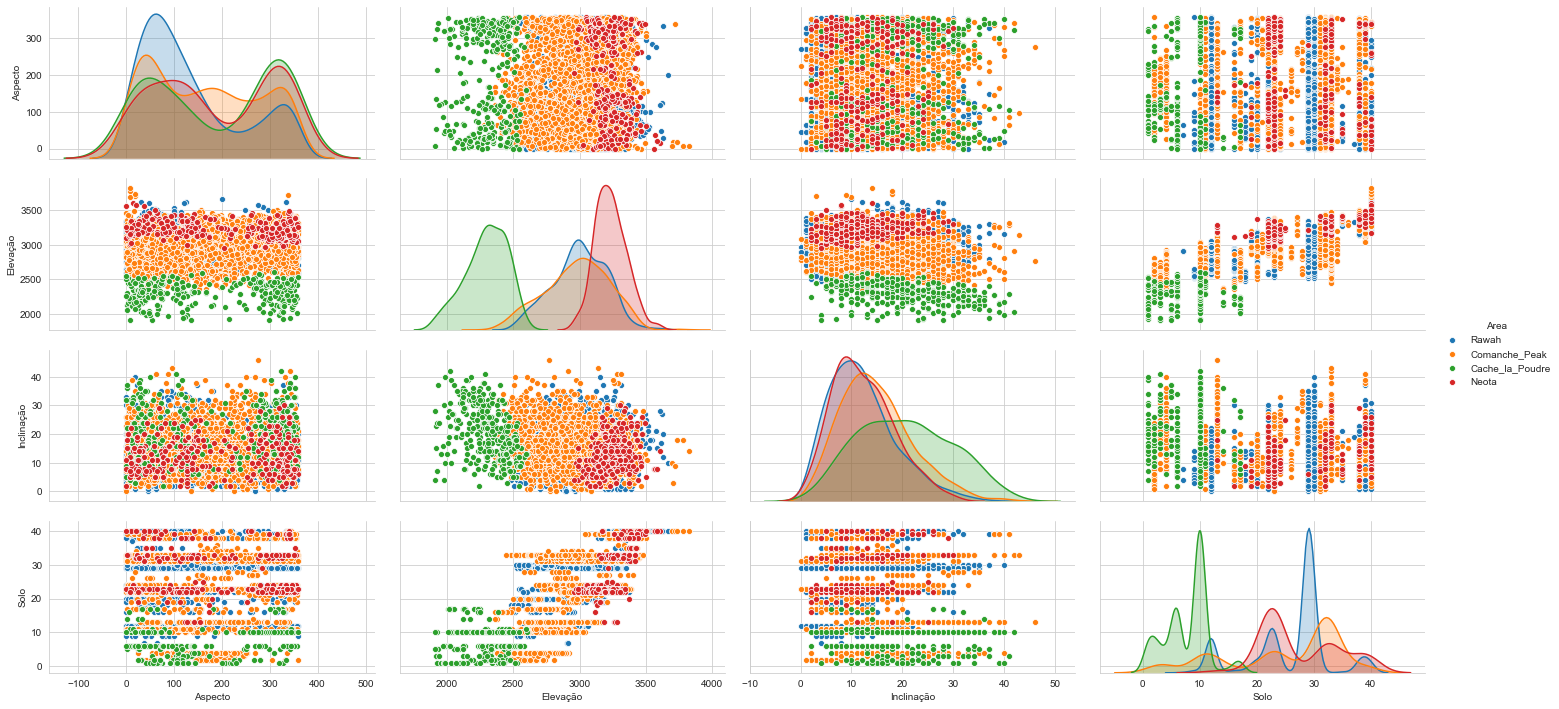

In [0]:
#@title Cria gráfico de corelação e distribuição das *Features* / Tipo de área.
#sns.set_palette('rainbow')
sns.pairplot(df_amostra, hue='Area', aspect=2)

Text(0.5, 1, 'Distribuição Tipos de cobertura X Inclinação/Elevação')

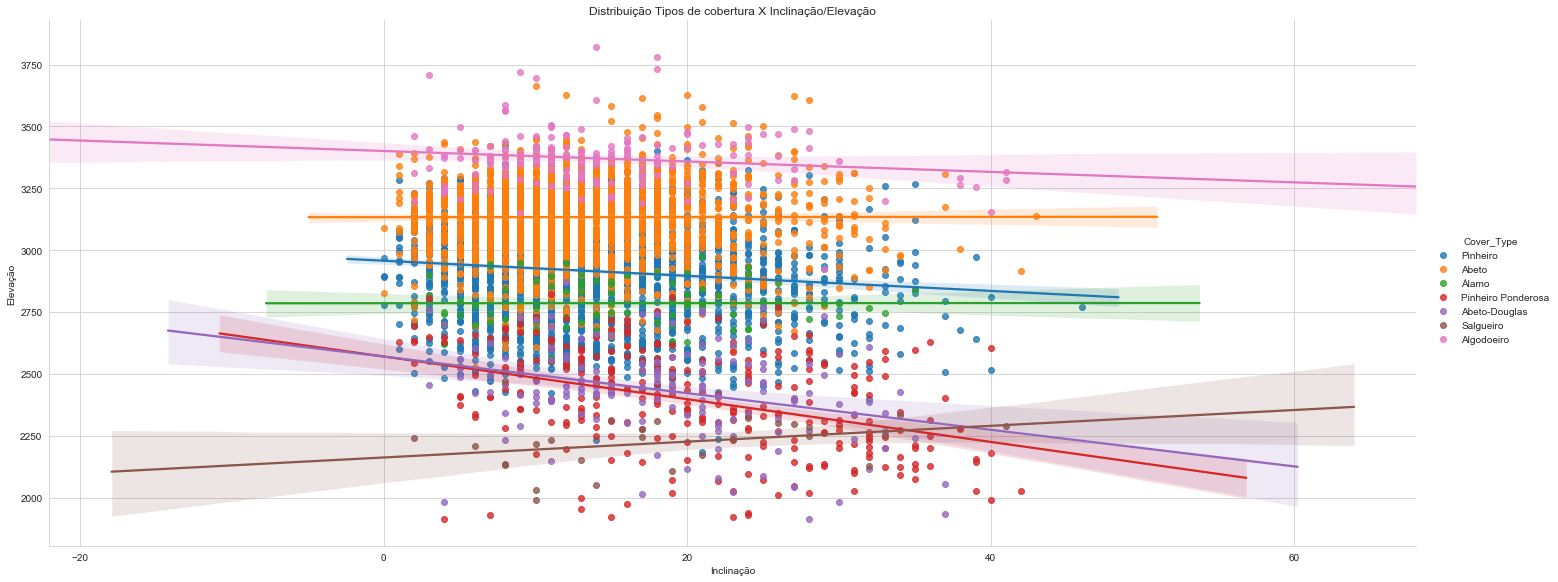

In [0]:
#@title Cria gráfico de distribuição das *Features* "Inclinação X Elevação" / Tipo de cobertura.
sns.lmplot('Inclinação','Elevação',  df_amostra, hue='Cover_Type', height=8, aspect=2.5)
plt.title('Distribuição Tipos de cobertura X Inclinação/Elevação')

Text(0.5, 1, 'Distribuição Tipos de cobertura X Aspecto/Elevação')

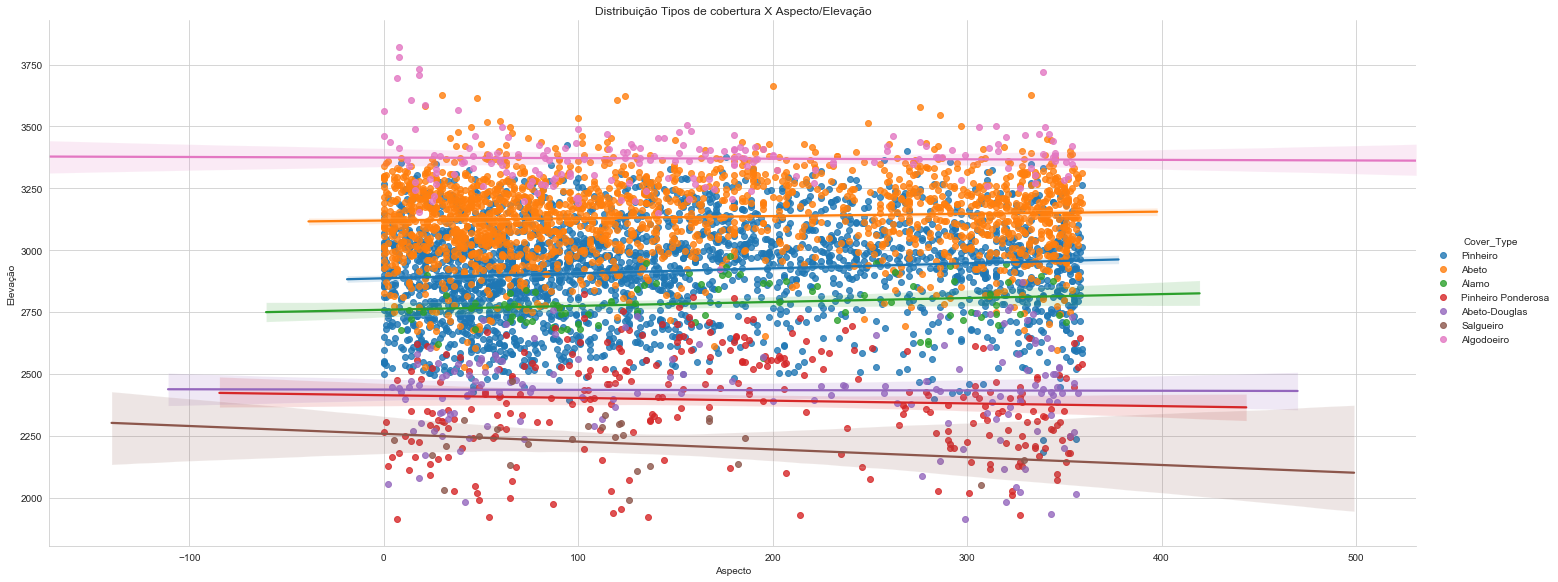

In [0]:
#@title Cria gráfico de disperção das *Features* "Aspecto X Elevação" / Tipo de cobertura.
sns.lmplot('Aspecto','Elevação',  df_amostra, hue='Cover_Type', height=8, aspect=2.5)
plt.title('Distribuição Tipos de cobertura X Aspecto/Elevação')

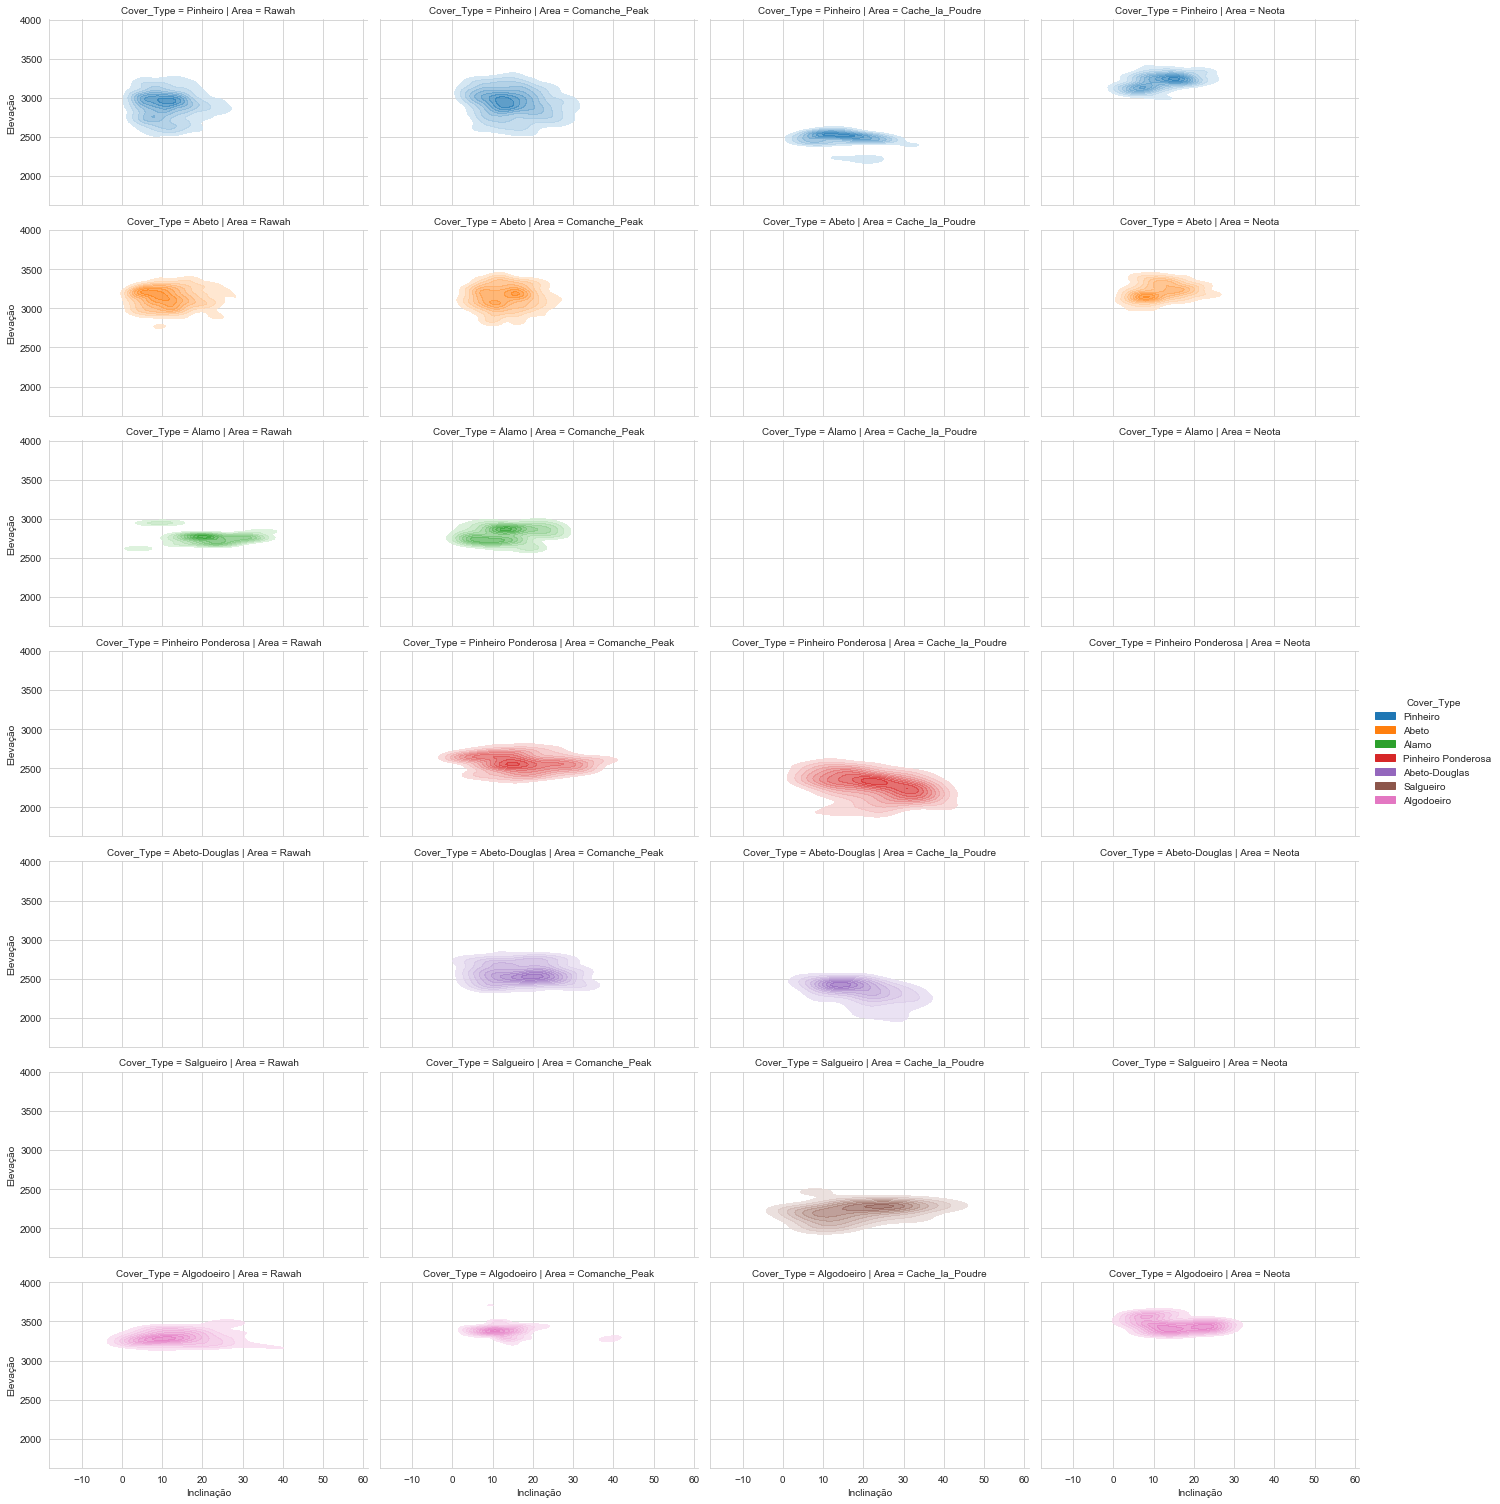

In [0]:
#@title Cria gráfico de distribuição das *Features* "Inclinação X Elevação" / Tipo de cobertura e Tipo de Área.
grid = sns.FacetGrid(df_amostra, col='Area', hue='Cover_Type', row='Cover_Type', aspect=1.6)
grid.map(sns.kdeplot,'Inclinação', 'Elevação', shade=True, shade_lowest=False, alpha=0.75)
grid.add_legend()

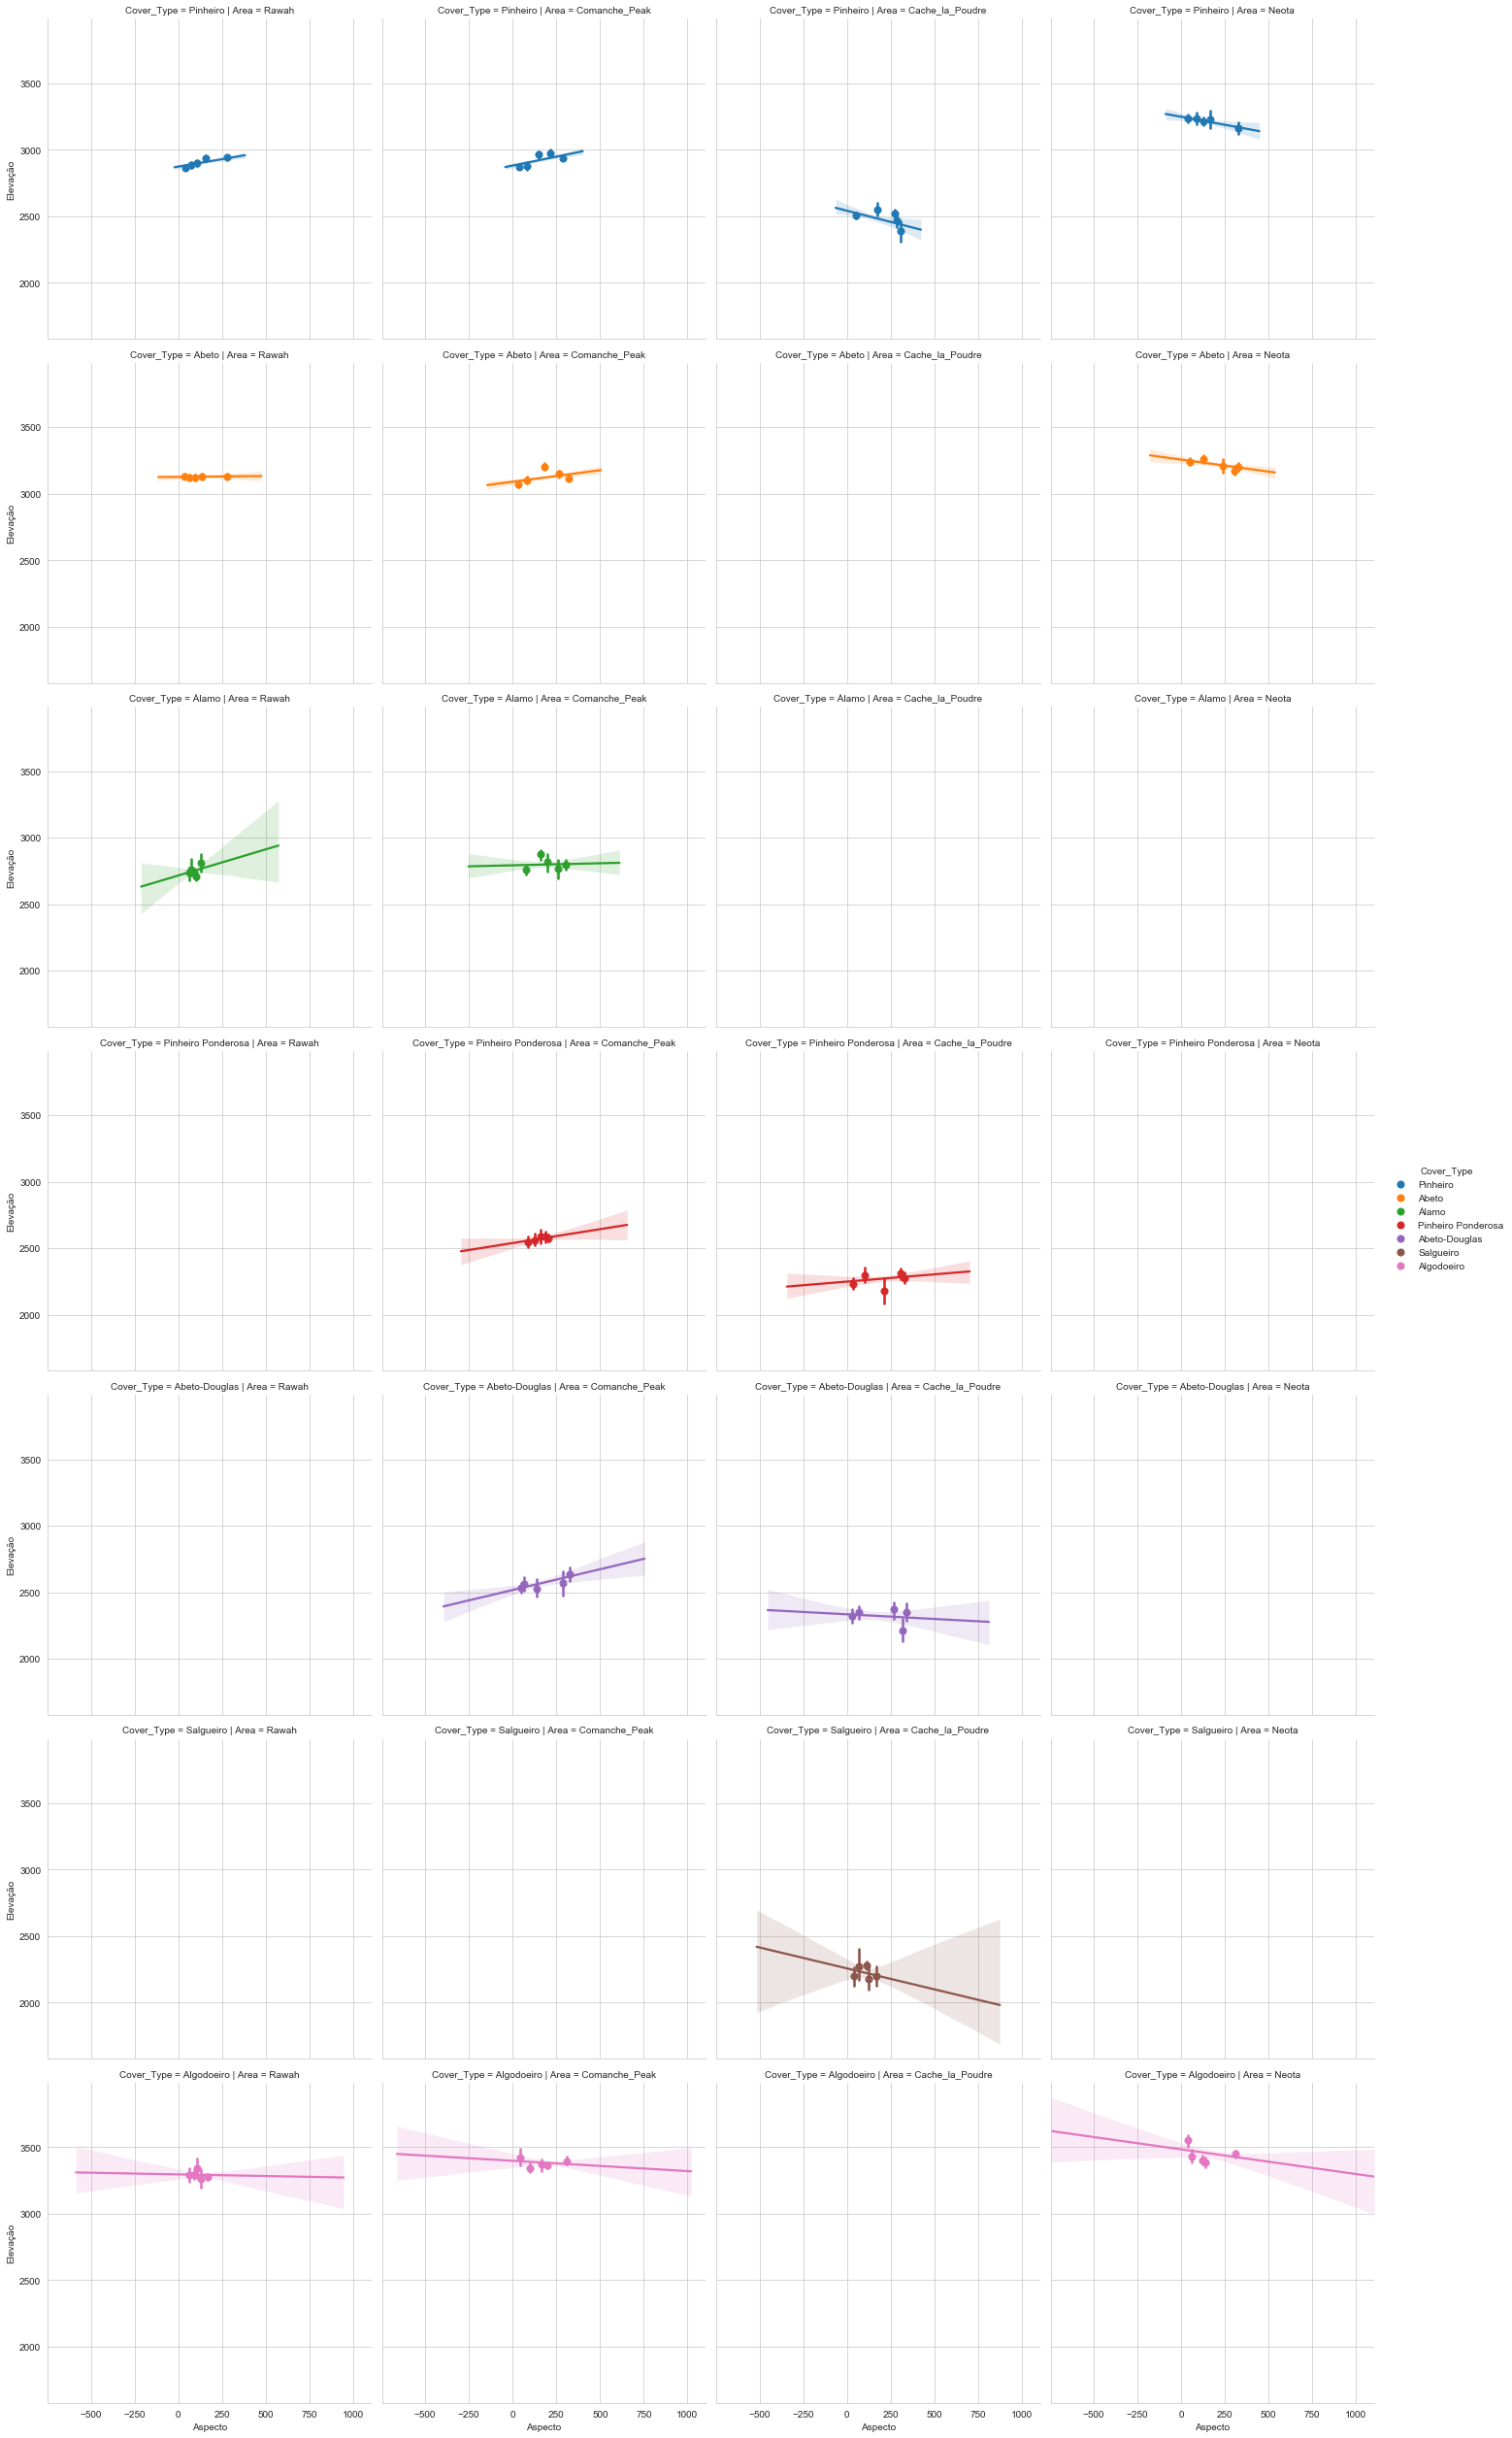

In [0]:
#@title Cria gráfico de disperção "Aspecto X Elevação" / Tipo de cobertura e Tipo de Área.
sns.lmplot('Aspecto', 'Elevação', df_amostra, hue='Cover_Type', col='Area', row='Cover_Type', x_bins=5).add_legend()

A análise exploratórioa dos dados contidos no *Dataset covtype*, ilustra a correlação direta entre a elevação do terreno, cobertura florestal, tipos de áreas selvagens e tipos de solo. Sendo assim, os tipos de cobertura florestal podem ser separados e classificados, principalmente, pela elevação do terreno e tipo de área selvagem.
Tendo em vista os gráficos gerados na análise, identifica-se as seguintes separações das classes:
<ul>
<li>Pinheiro: encontrado em todos os tipos de áreas selvagens com elevação entre 2500 e 3500, porém com maior concentração na Hawah e na Comanche Peak.
</li>
<li>Abeto: encontrado nos tipos de áreas selvagens com elevação entre 2500 e 3500 exceto Cache La Poudre, porém, com maior concentração na Hawah e Comanche Peak.
</li>
<li>Álamo: encontrado nos tipos de áreas selvagens Hawah e Comanche Peak com elevação entre 2500 e 3000 exceto Cache La Poudre.
</li>
<li>Algodoeiro: encontrado nos tipos de áreas selvagens Neota, Hawah e Comanche Peak com elevação acima de 3250, porém, com maior concentração na Hawah.
</li>
<li>Pinheiro-Ponderosa: encontrado nos tipos de áreas selvagens Cache La Poudre e Comanche Peak com elevação aproximadamente entre de 2000 e 2900, porém, com maior concentração na Cache La Poudre.
</li>
<li>Salgueiro: encontrado somente no tipo de área selvagem Cache La Poudre com elevação aproximadamente entre de 2000 e 2400, porém, com maior concentração entre 2200 e 2400.
</li>
<li>Abeto-Douglas: encontrado nos tipos de áreas selvagens Cache La Poudre e Comanche Peak com elevação aproximadamente entre de 2000 e 2900.
</li>
</ul>

Também pode-se observar nos gráficos que a predominância das áreas selvagens depende da elevação do terreno, como descrito abaxio:
<ul>
    <li>Cache La Poudre se encontra entre 1500 e 2750, aproximadamente.</li>
    <li>Rawah e Comanche Peak se encontram entre 2250 e 3500, aproximadamente.</li>
    <li>Neota se encontra entre 2750 e 3750, aproximadamente.</li>
</ul>

### 3) **(80%)** Nos blocos seguintes implemente seus classificadores (serão implementados 2 métodos diferentes).

#### 3.1) Qual método escolhido?

Árvore de decisão (DecisionTree)


In [0]:
#@title Faz a validação cruzada do método.
classificador = DecisionTreeClassifier()
X, y = getData()
result = cross_val_score(classificador, X, y, cv=10)
print('Média de acertos: ', result.mean(), '\nDesvio padrão: ', result.std())

Média de acertos:  0.5910267727117203 
Desvio padrão:  0.050061937528615846


#### 3.2) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.
#@title <ul><li>Istancia classe do método *DecisionTree*.</li><li>Divide a base para treino e teste.</li><li>Treina o modelo para baseline.</li></ul>

X = np.asanyarray(amostra.drop('Cover_Type', inplace=False, axis=1))
y = np.asanyarray(amostra['Cover_Type'])
dtree = DecisionTreeClassifier(random_state=101)
qtd_test=0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [0]:
#@title <ul><li>Tira predições do modelo.</li><li>Avalia a precisão do baseline</li><li>Exibe as métricas da classificação e a matriz de confusão do baseline.
predict = dtree.predict(X_test)
baseline_classification = classification_report(y_test, predict)
baseline_confusion = confusion_matrix(y_test, predict)
precisao_baseline = accuracy_score(y_test, predict)
print('Precisão do modelo: ', precisao_baseline,'\n\n')
print('------------Baseline Classification------------\n', baseline_classification)
print('------------Baseline Confusion------------\n', baseline_confusion)

Precisão do modelo:  0.8834871830666411 


------------Baseline Classification------------
               precision    recall  f1-score   support

           1       0.88      0.88      0.88     20870
           2       0.90      0.90      0.90     28079
           3       0.87      0.88      0.87      3436
           4       0.79      0.74      0.77       282
           5       0.68      0.70      0.69       936
           6       0.78      0.77      0.78      1738
           7       0.89      0.89      0.89      1966

    accuracy                           0.88     57307
   macro avg       0.83      0.82      0.82     57307
weighted avg       0.88      0.88      0.88     57307

------------Baseline Confusion------------
 [[18432  2184     5     0    44     4   201]
 [ 2312 25233   126     0   257   127    24]
 [    4   140  3007    44     9   232     0]
 [    0     0    60   210     0    12     0]
 [   25   233    13     0   657     8     0]
 [    9   122   245    13     4  1345     

#### 3.3) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
#@title <ul><li>Istancia a classe de normalização *MinMax* e normaliza os previsores. </li><li>Istancia a classe PCA e divide as bases de treino e teste.</li><li>Treina o modelo *Decision Tree* reduzido e normalizado.</li></ul>
mm_scaler = MinMaxScaler()
X = np.asanyarray(amostra.drop('Cover_Type', inplace=False, axis=1))
y = np.asanyarray(amostra['Cover_Type'])
X = mm_scaler.fit_transform(X[:,:10])
df_normalizado = pd.DataFrame(X, columns=df_covtypes.columns[:10])
df_normalizado = df_normalizado.join(df_covtypes.drop(['Elevação','Aspecto','Inclinação','H_Distance_Hidrologia','V_Distance_Hidrologia','H_Distance_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','H_Distance_Fire_Points','Cover_Type'], inplace=False, axis=1))
X = df_normalizado
error_rate = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)
pca = PCA(n_components=define_nComponentesPCA(X_train, X_test, y_train, y_test, qtd_test))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)
X_train, X_test = reduz_dimensionPCA(X_train, X_test)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

Text(0, 0.5, 'Taxa de Erro')

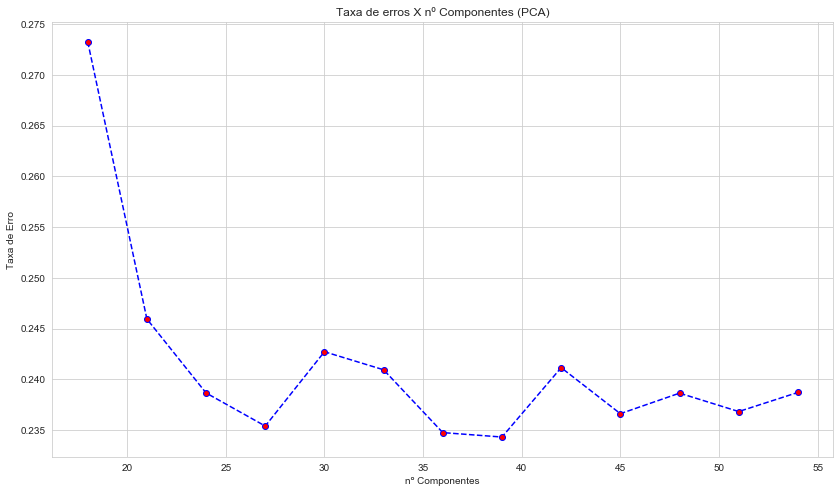

In [0]:
#@title Cria o gráfico de taxa de erros a partir do número de componentes PCA
plt.figure(figsize=(14,8))
plt.title('Taxa de erros X nº Componentes (PCA)')
plt.plot(range(18, 55, 3), error_rate, color='b', linestyle='dashed', marker='o', mfc='r')
plt.xlabel('nº Componentes')
plt.ylabel('Taxa de Erro')

In [0]:
#@title Média da relação entre os componentes e a distância entre os valores.
componentes = pca.explained_variance_ratio_
print('Quantidade de componentes: ', len(componentes), '\nMédia de variância: ', componentes.mean(), '\nDesvio padrão das variâncias',componentes.std())

Quantidade de componentes:  39 
Média de variância:  0.02557798859020485 
Desvio padrão das variâncias 0.049153545587383114


In [0]:
#@title <ul><li>Tira predições do modelo.</li><li>Avalia a precisão do modelo</li><li>Exibe as métricas da classificação e a matriz de confusão.
predict = dtree.predict(X_test)
classification = classification_report(y_test, predict)
confusion = confusion_matrix(y_test, predict)
precisao = accuracy_score(y_test, predict)
print('Precisão do baseline: ',precisao_baseline,'\nPrecisão do modelo: ', precisao,'\n\n')
print('\n------------------Classification-----------------\n', classification)
print('\n-------------------Confusion-------------------\n', confusion)

Precisão do baseline:  0.8834871830666411 
Precisão do modelo:  0.7666428185038477 



------------------Classification-----------------
               precision    recall  f1-score   support

           1       0.77      0.77      0.77     20856
           2       0.81      0.80      0.81     28007
           3       0.72      0.71      0.72      3542
           4       0.57      0.57      0.57       257
           5       0.42      0.43      0.43       987
           6       0.52      0.53      0.52      1717
           7       0.71      0.71      0.71      1941

    accuracy                           0.77     57307
   macro avg       0.65      0.65      0.65     57307
weighted avg       0.77      0.77      0.77     57307


-------------------Confusion-------------------
 [[16021  4239     9     1    84    27   475]
 [ 4280 22534   394     5   440   276    78]
 [   21   428  2523    61    25   484     0]
 [    0     5    71   147     1    33     0]
 [   78   421    33     2   425    

#### 3.4) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
#@title Istancia o método *DecisionTree* definindo *Entropy* como critério de cálculo.
dtree = DecisionTreeClassifier(criterion='entropy', random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [0]:
#@title <ul><li>Tira predições do modelo.</li><li>Avalia a precisão do modelo *tunned*</li><li>Exibe as métricas da classificação e a matriz de confusão *tunned*.
predict = dtree.predict(X_test)
tunned_classification = classification_report(y_test, predict)
tunned_confusion = confusion_matrix(y_test, predict)
precisao_tunned = accuracy_score(y_test, predict)
print('Precisão do baseline: ',precisao_baseline,'\nPrecisão do modelo: ', precisao,'\nPrecisão tunned: ',precisao_tunned,'\n\n')
print('-------------Tunned Classification--------------\n', tunned_classification)
print('\n------------Tunned Confusion-------------------\n', tunned_confusion)

Precisão do baseline:  0.8834871830666411 
Precisão do modelo:  0.7666428185038477 
Precisão tunned:  0.8548519378086447 


-------------Tunned Classification--------------
               precision    recall  f1-score   support

           1       0.85      0.85      0.85     20949
           2       0.88      0.88      0.88     28122
           3       0.82      0.82      0.82      3463
           4       0.68      0.65      0.66       256
           5       0.66      0.64      0.65       958
           6       0.70      0.71      0.70      1607
           7       0.84      0.85      0.84      1952

    accuracy                           0.85     57307
   macro avg       0.78      0.77      0.77     57307
weighted avg       0.85      0.85      0.85     57307


------------Tunned Confusion-------------------
 [[17890  2722     4     0    52     9   272]
 [ 2736 24682   257     4   244   162    37]
 [    8   256  2852    53    10   284     0]
 [    0     1    66   167     0    22     0]

#### 3.5) Qual método escolhido?

KNN (K-Nearest Neighbors)

In [0]:
#@title Faz a validação cruzada do método.
classificador = KNeighborsClassifier()
X, y = getData()
knn_result = cross_val_score(classificador, X, y, cv=10)
print('Média de acertos: ', knn_result.mean(), '\nDesvio padrão: ', knn_result.std())

Média de acertos:  0.5413944167143944 
Desvio padrão:  0.0438161232494388


#### 3.6) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.
#@title <ul><li>Istancia a KNN (*K Nearest Neighbors*)</li><li>Divide a base para treino e teste</li><li>Treina o modelo baseline</li></ul>

X = np.asanyarray(amostra.drop('Cover_Type', inplace=False, axis=1))
y = np.asanyarray(amostra['Cover_Type'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
#@title <ul><li>Tira predições do modelo.</li><li>Avalia a precisão do baseline</li><li>Exibe as métricas da classificação e a matriz de confusão do baseline.
predict = knn.predict(X_test)
knn_precisao_baseline = accuracy_score(y_test, predict)
knn_baseline_classification = classification_report(y_test, predict)
knn_baseline_confusion = confusion_matrix(y_test, predict)
print('Precisão do baseline: ', knn_precisao_baseline,'\n')
print('\n------------Baseline Classification------------\n', knn_baseline_classification)
print('\n------------Baseline Confusion----------------\n', knn_baseline_confusion)

Precisão do baseline:  0.9217896592039367 


------------Baseline Classification------------
               precision    recall  f1-score   support

           1       0.93      0.92      0.92     21029
           2       0.93      0.94      0.93     27919
           3       0.90      0.91      0.91      3470
           4       0.86      0.72      0.78       271
           5       0.82      0.76      0.79       952
           6       0.86      0.80      0.83      1744
           7       0.95      0.90      0.92      1922

    accuracy                           0.92     57307
   macro avg       0.89      0.85      0.87     57307
weighted avg       0.92      0.92      0.92     57307


------------Baseline Confusion----------------
 [[19312  1606     1     0    17     7    86]
 [ 1307 26302   102     0   125    71    12]
 [    3   139  3175    22     9   122     0]
 [    0     5    55   195     0    16     0]
 [   27   190     6     0   725     4     0]
 [    0   145   194    10     3  13

#### 3.7) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.
#@title <ul><li>Divide a base para treino e teste</li><li>Istancia a KNN (*K Nearest Neighbors*)</li><li>Treina o modelo reduzido e normalizado por *MinMax*.</li></ul>
X = np.asanyarray(amostra.drop('Cover_Type', inplace=False, axis=1))
y = np.asanyarray(amostra['Cover_Type'])
X = mm_scaler.fit_transform(X)

error_rate = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)

pca = PCA(n_components=define_nComponentesPCA(X_train, X_test, y_train, y_test,qtd_test))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)
X_train, X_test = reduz_dimensionPCA(X_train, X_test)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Text(0, 0.5, 'Taxa de Erro')

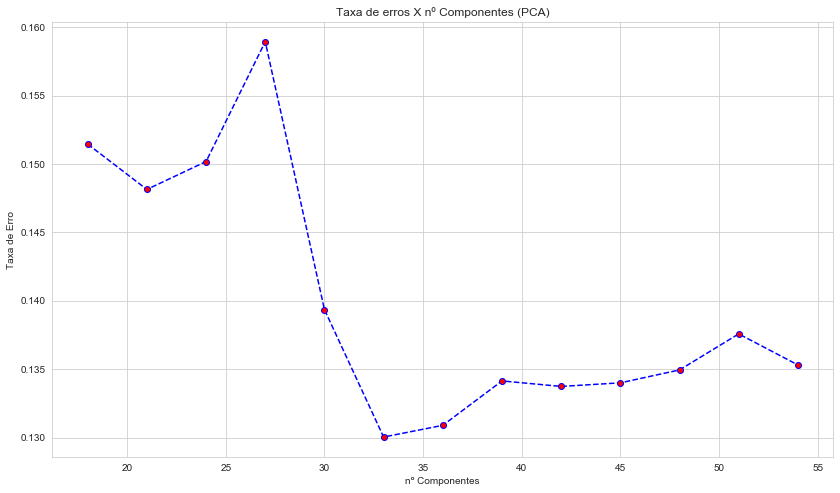

In [0]:
#@title Cria o gráfico de taxa de erros a partir do número de componentes PCA
plt.figure(figsize=(14,8))
plt.title('Taxa de erros X nº Componentes (PCA)')
plt.plot(range(18, 55, 3), error_rate, color='b', linestyle='dashed', marker='o', mfc='r')
plt.xlabel('nº Componentes')
plt.ylabel('Taxa de Erro')

In [0]:
#@title Média da relação entre os componentes e a distância entre os valores.
knn_componentes = pca.explained_variance_ratio_
print('Quantidade de componentes:', len(knn_componentes), '\nMédia de variância:', knn_componentes.mean(), '\nDesvio padrão das variâncias:',knn_componentes.std())

Quantidade de componentes: 33 
Média de variância: 0.029792161896702293 
Desvio padrão das variâncias: 0.051984432794563155


In [0]:
#@title <ul><li>Tira predições do modelo.</li><li>Avalia a precisão do modelo.</li><li>Exibe as métricas da classificação e a matriz de confusão do modelo.
predict = knn.predict(X_test)
knn_precisao = accuracy_score(y_test, predict)
knn_classification = classification_report(y_test, predict)
knn_confusion = confusion_matrix(y_test, predict)
print('Precisão do baseline: ', knn_precisao_baseline,'\nPrecisão do modelo: ', knn_precisao,'\n')
print('\n--------------Classification--------------\n', knn_classification)
print('\n----------------Confusion----------------\n', knn_confusion)

Precisão do baseline:  0.9217896592039367 
Precisão do modelo:  0.8818294449194688 


--------------Classification--------------
               precision    recall  f1-score   support

           1       0.89      0.88      0.88     20960
           2       0.89      0.91      0.90     27974
           3       0.85      0.87      0.86      3572
           4       0.76      0.67      0.71       248
           5       0.76      0.63      0.69       912
           6       0.74      0.70      0.72      1641
           7       0.90      0.87      0.89      2000

    accuracy                           0.88     57307
   macro avg       0.83      0.79      0.81     57307
weighted avg       0.88      0.88      0.88     57307


----------------Confusion----------------
 [[18358  2404     0     0    22     8   168]
 [ 2071 25438   171     2   146   122    24]
 [    3   192  3094    35    10   238     0]
 [    0     5    52   166     0    25     0]
 [   43   273    16     0   575     5     0]
 [  

#### 3.8) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.
#@title <ul><li>Istancia a classe "KNN".</li><li>Define o número de "k".</li><li>Treina o modelo *tunned*.
error_rate = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)
X_train, X_test = reduz_dimensionPCA(X_train, X_test)
knn = KNeighborsClassifier(n_neighbors=define_k(X_train, X_test, y_train, y_test))
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Text(0.5, 1.0, 'Taxa de erro X Nº de Vizinhos')

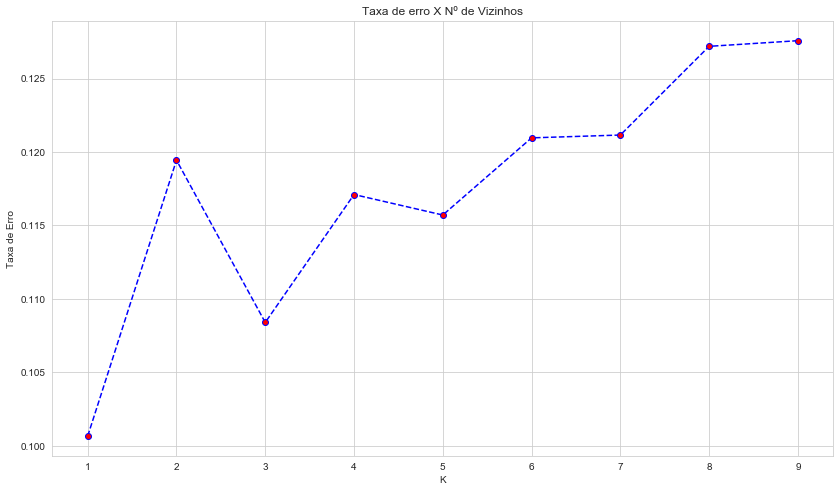

In [0]:
#@title Cria o gráfico de taxa de erros a partir do número de "k".
plt.figure(figsize=(14,8))
plt.plot(range(1, 10), error_rate, color='b', linestyle='dashed', marker='o', mfc='r')
plt.xlabel('K')
plt.ylabel('Taxa de Erro')
plt.title("Taxa de erro X Nº de Vizinhos")

In [0]:
#@title <ul><li>Tira predições do modelo.</li><li>Avalia a precisão do modelo *tunned*</li><li>Exibe as métricas da classificação e a matriz de confusão *tunned*.
predict = knn.predict(X_test)
knn_precisao_tunned = accuracy_score(y_test, predict)
knn_tunned_classification = classification_report(y_test, predict)
knn_tunned_confusion = confusion_matrix(y_test, predict)
print('Precisão do baseline: ',knn_precisao_baseline,'\nPrecisão do modelo: ', knn_precisao,'\nPrecisão tunned: ',knn_precisao_tunned,'\n\n')
print('\n-----------Tunned Classification------------\n', knn_tunned_classification)
print('\n-----------Tunned Confusion--------------\n', knn_tunned_confusion)

Precisão do baseline:  0.9217896592039367 
Precisão do modelo:  0.8818294449194688 
Precisão tunned:  0.899331669778561 



-----------Tunned Classification------------
               precision    recall  f1-score   support

           1       0.90      0.90      0.90     20879
           2       0.91      0.92      0.92     28082
           3       0.88      0.87      0.88      3492
           4       0.79      0.76      0.77       268
           5       0.74      0.75      0.75       941
           6       0.76      0.76      0.76      1734
           7       0.91      0.91      0.91      1911

    accuracy                           0.90     57307
   macro avg       0.84      0.84      0.84     57307
weighted avg       0.90      0.90      0.90     57307


-----------Tunned Confusion--------------
 [[18769  1936     2     0    22     7   143]
 [ 1866 25782   113     4   191   108    18]
 [    3   132  3035    34    20   268     0]
 [    0     1    44   204     0    19     0]
 [   30  

### 5) **(10%)** Conclusões

*Compare seus resultados. Imaginando que sua solução fosse para produção, qual deles você escolheria? Por que? Quais os riscos você enxerga? O que recomendaria de próximos passos para melhorar os resultados?*

Os modelos de treinamento supervisionado escolhidos para comparação foram o *Decision Tree*, traduzido para o português como Árvore de Decisão, e o *k-Nearest Neighbors*, traduzido para o português como k-Vizinhos mais próximos. Onde K define o número de vizinhos a serem comparados.<br />
Definidos os *baselines* de cada um dos modelos, foram implementadas as técnicas de redução de dimensionalidade *Principal Component Analysis (PCA)* e de escalonamento para normalização dos dados *MinMax*.<br />
Com as dimensões da base reduzidas e os dados normalizados, para tornar os modelos mais eficientes, foram alterados hiper-parâmetros como a métrica no caso da árvore de dicisão, e o número de vizinhos no caso do *KNN*.
Abaixo seguem os valores de variância entre os principais componentes analisados (PCA) e as pontuações de precisão obtidas pelo *Accuracy Score*:

In [0]:
print('Decision Tree\n\nQuantidade de componentes:', len(componentes), '\nMédia de variância:', componentes.mean(), '\nDesvio padrão das variâncias:',componentes.std(),'\n')
print('Precisão do baseline: ',precisao_baseline,'\nPrecisão do modelo: ', precisao,'\nPrecisão tunned: ',precisao_tunned,'\n')
print('-------------------------------------------------------\n')
print('k-Nearest Neighbors\n\nQuantidade de componentes:', len(knn_componentes), '\nMédia de variância:', knn_componentes.mean(), '\nDesvio padrão das variâncias:',knn_componentes.std(),'\n')
print('Precisão do baseline: ',knn_precisao_baseline,'\nPrecisão do modelo: ', knn_precisao,'\nPrecisão tunned: ',knn_precisao_tunned,'\n\n')

Decision Tree

Quantidade de componentes: 39 
Média de variância: 0.02557798859020485 
Desvio padrão das variâncias: 0.049153545587383114 

Precisão do baseline:  0.8834871830666411 
Precisão do modelo:  0.7666428185038477 
Precisão tunned:  0.8548519378086447 

-------------------------------------------------------

k-Nearest Neighbors

Quantidade de componentes: 33 
Média de variância: 0.029792161896702293 
Desvio padrão das variâncias: 0.051984432794563155 

Precisão do baseline:  0.9217896592039367 
Precisão do modelo:  0.8818294449194688 
Precisão tunned:  0.899331669778561 




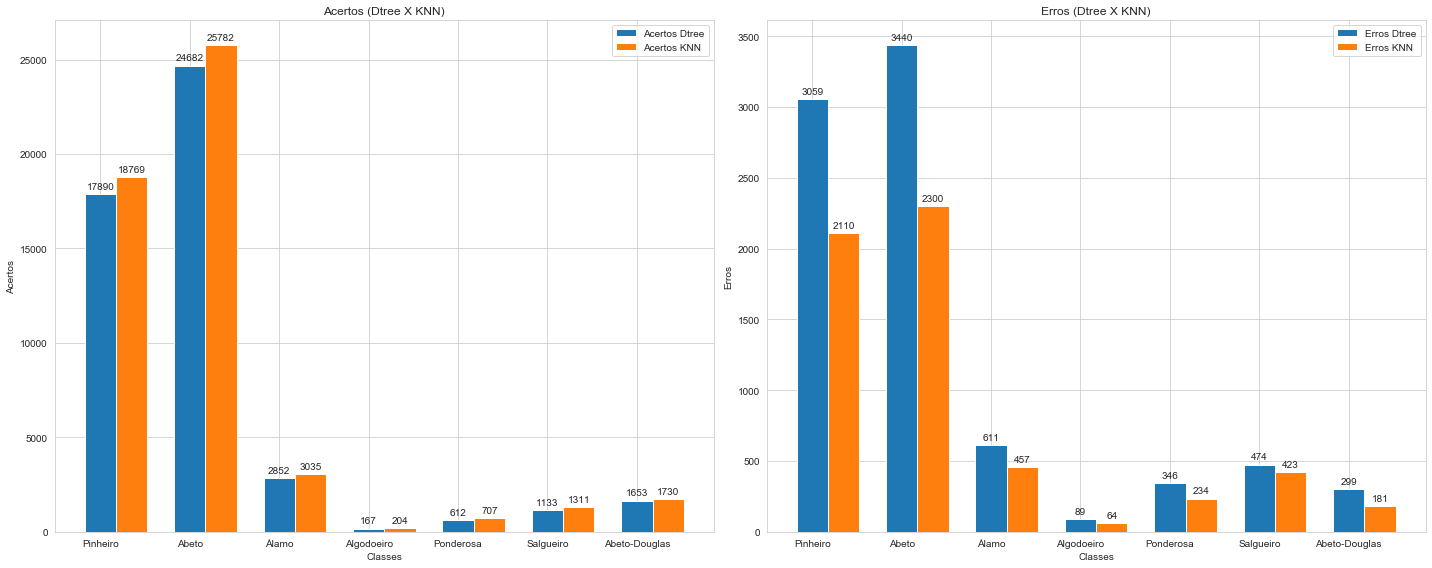

In [0]:
#@title Gráficos de comparação Acertos (*Dtree* X *KNN*) e Erros (*Dtree* X *KNN*).
class_names = ['Pinheiro', 'Abeto', 'Álamo', 'Algodoeiro', 'Ponderosa', 'Salgueiro', 'Abeto-Douglas']

y1 = acertos_erros(tunned_confusion, knn_tunned_confusion)[0]
y2 = acertos_erros(tunned_confusion, knn_tunned_confusion)[1]
y3 = acertos_erros(tunned_confusion, knn_tunned_confusion)[2]
y4 = acertos_erros(tunned_confusion, knn_tunned_confusion)[3]

x = np.arange(len(class_names))
width = 0.35

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
p1 = ax1.bar(class_names, y1, width, label= 'Acertos Dtree')
p2 = ax1.bar(x + width, y2, width, label= 'Acertos KNN')

ax1.set_ylabel('Acertos')
ax1.set_xlabel('Classes')
ax1.set_xticks(class_names)
ax1.set_xticklabels(class_names)
ax1.legend()
ax1.set_title("Acertos (Dtree X KNN)")

p3 = ax2.bar(class_names, y3, width, label= 'Erros Dtree')
p4 = ax2.bar(x + width, y4, width, label= 'Erros KNN')

ax2.set_ylabel('Erros')
ax2.set_xlabel('Classes')
ax2.set_xticks(class_names)
ax2.set_xticklabels(class_names)
ax2.legend()
ax2.set_title("Erros (Dtree X KNN)")

autolabel1(p1)
autolabel1(p2)
autolabel2(p3)
autolabel2(p4)
fig.tight_layout()

A melhor opção dentre os 2 modelos apresentados seria o KNN, pois apresentou resultados molhores em todos os quisitos. A versão *Tunned* seria a melhor escolha para colocar em produção, apesar de ter uma precisão menor que o *baseline*, as dimensões foram reduzidas consideravelmente mantendo a precisão acima de 90% para amostra submetida ao treino e teste do modelo.<br />
O maior risco é a generalização dos ruídos causando *Overfitting*.

C:\Users\ANDRE\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


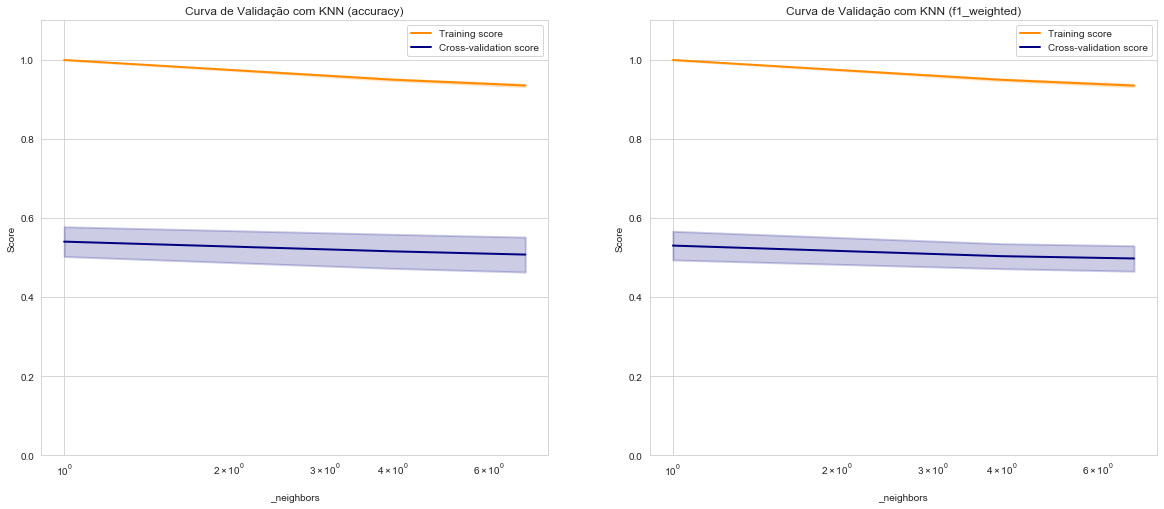

In [0]:
param_range = np.arange(1, 9, 3)
cv = StratifiedKFold(4)

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X, y, param_name='n_neighbors', param_range=param_range,
    scoring="accuracy", n_jobs=1, cv=cv, error_score='raise')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

ax1.set_title("Curva de Validação com KNN (accuracy)")
ax1.set_xlabel("\n_neighbors")
ax1.set_ylabel("Score")
ax1.set_ylim(0.0, 1.1)
lw = 2
ax1.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
ax1.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
ax1.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
ax1.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
ax1.legend(loc="best")

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X, y, param_name='n_neighbors', param_range=param_range,
    scoring="f1_weighted", n_jobs=1, cv=cv, error_score='raise')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

ax2.set_title("Curva de Validação com KNN (f1_weighted)")
ax2.set_xlabel("\n_neighbors")
ax2.set_ylabel("Score")
ax2.set_ylim(0.0, 1.1)
lw = 2
ax2.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
ax2.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
ax2.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
ax2.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
ax2.legend(loc="best")
fig.show()

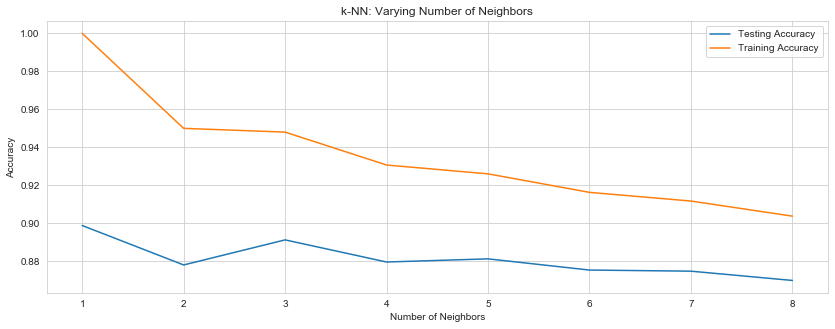

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)
X_train, X_test = reduz_dimensionPCA(X_train, X_test)

neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

plt.figure(figsize=(20, 5))
for i, k in enumerate(neighbors):

    #polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    #linear_regression = LinearRegression()
    
    knn = KNeighborsClassifier(n_neighbors=k)
    #X_train, X_test = reduz_dimensionPCA(X_train, X_test)
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Tratar os *outliers* identificados no gráfico abaixo removendo ou sbstituindo os valores pela média dos vizinhos.

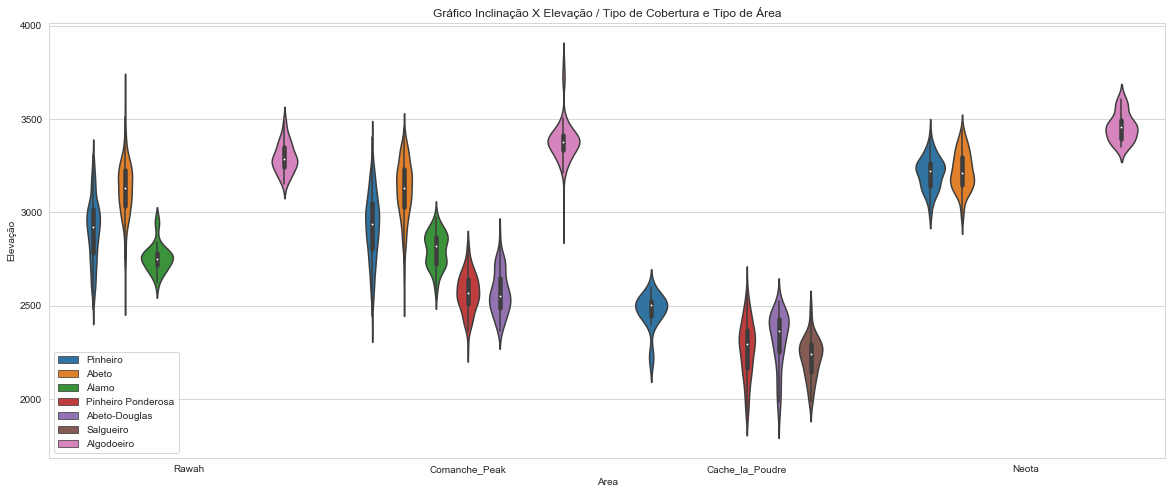

In [0]:
#@title Gráfico para identificação dos *outliers* Área X Elevação / Tipo de Cobertura
plt.figure(figsize=(20,8))
sns.boxplot(x='Area', y='Elevação', data=df_amostra, hue='Cover_Type')
plt.title('Gráfico Inclinação X Elevação / Tipo de Cobertura e Tipo de Área')
plt.legend()